# Lab 8
# 0. Intro
Welcome to Lab 8! This lab covers:
* how to find the best number for a job (optimization), and
* how to find the best-fitting line for a scatter plot (regression using optimization).

First we'll learn about optimal ice cream truck placement.  Then we'll use regression to get an accurate estimate of the age of the universe from pictures of exploding stars.

#### Administrative details
Lab submissions are due by **Friday, March 11 at 7:00 PM**.

As usual, if you attend lab section and make a good effort but don't finish during the 2 hours, let your TA know, and you'll get full credit for the lab.  If you do that, please finish the lab on your own time (or in office hours, of course).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.assignment import load_assignment 
lab08 = load_assignment('lab08.ok')

Assignment: Lab 8
OK, version v1.5.2



# 1. Optimization

First came marbles; now Data 8 is branching out into the ice cream market.  We're catering to San Francisco hipsters, so we operate a truck that sells our fresh organic Sriracha-Kale ice cream.  Today we have driven our truck to Ocean Beach, a long, narrow beach on the western coast of the city.

<img src="ocean_beach.jpg">

Upon arriving, we find that our potential customers are spread out along the beach.  We decide we want to park our truck in the location that's closest *on average* to all the customers.  That way, customers will be more likely to come to our truck.

(This may not be a great way to choose our truck's location.  Maybe you can think of a better way to decide on a location.)

We canvas the beach and record the location of each beachgoer in a table called `customers`.  The beach is oriented roughly North/South, and it's narrow, so we ignore how close each beachgoer is to the water, and record only how far north each person is from the southern end of the beach.

<img src="beach_locations.jpg">

Suppose there are 2 people on the beach, at 600 meters and 950 meters from the Southern end, respectively.  If we park our truck at 750 meters, the average distance from our truck to customers is:

$$\frac{|600 - 750| + |950 - 750|}{2},$$

Here are two ways to write that in Python:

In [2]:
# A direct translation:
(abs(600 - 750) + abs(950 - 750)) / 2

175.0

In [3]:
# Here is a craftier translation of the math into Python,
# using arrays.  Notice that if we had many more customers,
# all we'd have to change is the q10_customer_distances
# array.

# The customer locations:
q10_customer_locations = np.array([600, 950])

# Our location:
q10_truck_location = 750

# Now we compute the differences between those locations and
# ours.  Note that these are negative, so they don't really
# make sense.
q10_differences = q10_customer_locations - q10_truck_location

# What we really want is the *distances on the number line*
# between the customer locations and ours, which are the absolute
# values of the differences.  np.abs computes the absolute
# values of each number in an array, returning an array of those
# absolute values (with the same length as the array you give it).
q10_distances = np.abs(q10_differences)

# Now we just average those.
q10_avg_distance = np.mean(q10_distances)
q10_avg_distance

175.0

**Question 1.1.** Suppose there were only 3 people on the beach, and their locations were 800, 1000, and 1800 meters from the Southern end, respectively.  If we park our ice cream truck at the mean of those locations, what is the average distance from our truck to customers?

In [4]:
q11_customer_locations = np.array([800, 1000, 1800])

# Compute this.
q11_avg_distance = np.mean(np.abs(q11_customer_locations - np.mean(q11_customer_locations))) #SOLUTION
q11_avg_distance

400.0

In [5]:
_ = lab08.grade('q11')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.2.** If we park our truck at 1100 meters instead, what's the average distance from our truck to a customer?

In [6]:
# Fill in q12_avg_distance.  Use code to compute it.
q12_avg_distance = np.mean(np.abs(q11_customer_locations - 1100)) #SOLUTION
q12_avg_distance

366.66666666666669

In [7]:
_ = lab08.grade('q12')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3.** Which location would be better, according to the criterion we're using?

In [8]:
# Fill in the location among the two locations we've tried that gives
# the better average distance to customers.  For example, if the
# mean from question 1.1 was better, set q13_better_location to:
#   np.mean(q11_customer_locations)
q13_better_location = 1100 #SOLUTION

In [9]:
_ = lab08.grade('q13')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now we'll introduce the full dataset.  Run the next cell to load it.

Distance from south end (m)
278.819
1234.84
765.672
1857.39
1759.31
671.602
207.426
1046.42
1629.44
443.936


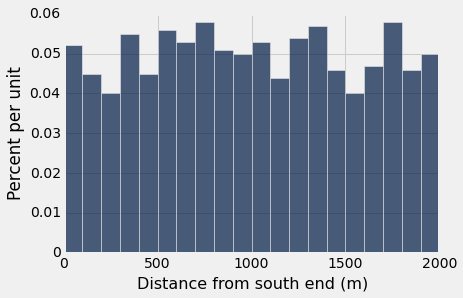

In [10]:
# Just run this cell.
customers = Table.read_table("customers.csv")
customers.hist(bins=np.arange(0, 2001, 100))
customers

Let's think very precisely about what we're trying to optimize.  Given these customer locations, we want to find a *single location*.  If we park our truck at that location, we want it to result in the smallest *average distance from our truck to customers*.

**Question 1.4.** Write a function called `average_distance`.  It should take a single number as its argument (a truck location) and return the average distance from that location to the customers in the `customers` table.  At a high level, this function tells us how badly we're meeting our objective.  So it's called an *objective function*.  We'll eventually want to find the distance that produces the smallest value of this objective function.

In [11]:
def average_distance(truck_location):
    # Fill in the function definition here.
    return np.mean(np.abs(customers.column(0) - truck_location)) #SOLUTION

average_distance(1100)

497.99221233339301

In [12]:
_ = lab08.grade('q14')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Here's one way to find the best location using a computer:

1. Check a bunch of locations,
2. compute the average distance (the value of our objective function `average_distance`) for each one, and
3. pick the location with the smallest average distance.

This is called a "brute-force" technique because it uses a lot of computation.  But it gets the job done.

**Question 1.5.** First we'll examine the distances manually to find the best spot.  To do that we need to visualize them.  Fill in the code below to make a graph of the objective function.

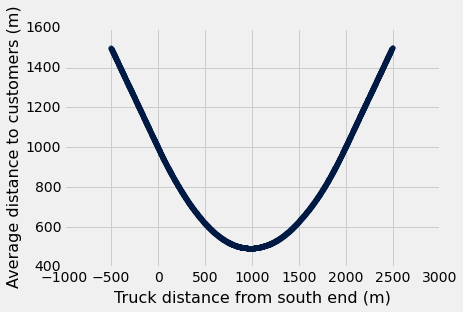

In [13]:
# First we'll figure out the locations to try.  We've done
# that for you.  We try every meter on the beach, plus
# half a kilometer in either direction for good measure.
lowest_location = int(min(customers.column(0))) - 500
highest_location = int(max(customers.column(0))) + 501
locations = np.arange(lowest_location, highest_location, 1)
potential_locations = Table().with_column("Truck distance from south end (m)", locations)

# You fill in this part.  average_distances should be an array
# where the element at index i is the average distance from
# customers when our truck is at:
#   potential_locations.column("truck location").item(i)
average_distances = potential_locations.apply(average_distance, 0) #SOLUTION

# Now we just make a scatter plot of the average distances
# you just computed, with potential truck locations on the
# horizontal axis and the average distances from customers
# on the vertical axis and potential.  You don't need to
# change this part.
locations_with_distances = potential_locations.with_column(
    "Average distance to customers (m)", average_distances)
locations_with_distances.scatter(0, 1)

In [14]:
_ = lab08.grade('q15')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.6.** Looking at the graph, what would you say is the best location, rounded to the nearest 100?

In [15]:
# Fill in your guess here
q16_best_location_guess = 1000 #SOLUTION

In [16]:
_ = lab08.grade('q16')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.7.** Instead of looking at a graph, we can have the computer find the best location for us (among all the locations we tried).  Do that using the `locations_with_distances` table you created.

In [17]:
# Now write code to find the truck location with the smallest
# average distance to customers in the locations_with_distances
# table. If you find two equivalent answers, pick either one.
q17_best_location = locations_with_distances.sort(1).column(0).item(0) #SOLUTION
q17_best_location

992

In [18]:
_ = lab08.grade('q17')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The function `minimize` does basically the same thing you just did.  It takes as its argument a *function*, the objective function.  It returns an *array* of inputs that produces the smallest output value of the objective function.  For example, here's a function and its graph:

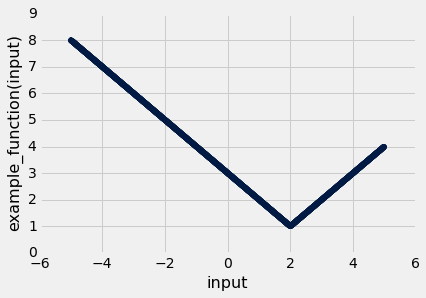

In [19]:
# Just run this cell.

# Here's an example function we might want to minimize:
def example_function(x):
    return abs(x - 2) + 1

# This makes a graph of its values at various points.
example_inputs = Table().with_column("input", np.arange(-5, 5, .001))
example_values = example_inputs.with_column("example_function(input)", example_inputs.apply(example_function, 0))
example_values.scatter(0, 1)

This graph shows us a few things:
1. The minimum value of `example_function` is 1.
2. That value is `example_function(2)`.
3. Therefore, we say that the input 2 *minimizes* `example_function`.

Calling `minimize` on `example_function` verifies this:

In [20]:
# Just run this cell.
minimizing_arg = minimize(example_function)
minimum_value = example_function(minimizing_arg)
print("example_function is minimized at", minimizing_arg, "with value", minimum_value)

example_function is minimized at [ 2.] with value [ 1.]


In [21]:
minimize(example_function)

array([ 2.])

**Question 1.8** Use `minimize` to find the best location for our ice cream truck.

In [22]:
# Write code to compute the best location, using minimize.
q18_best_location = minimize(average_distance) #SOLUTION
q18_best_location

993.1627684

In [23]:
_ = lab08.grade('q18') #FIXME

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Two hours later we find that most people on the beach have moved or left, so the pattern of customer locations is different.  The data for the next day are in `customers2.csv`.  

Distance from south end (m)
883.277
619.053
634.417
617.779
654.781
1120.19
549.431
945.256
785.69
808.331


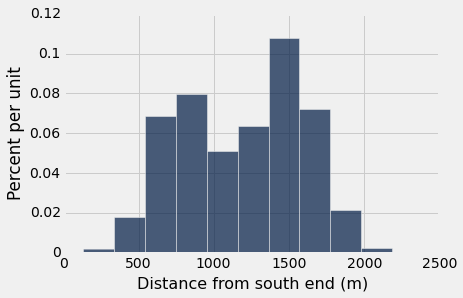

In [24]:
# Just run this cell.
q19_customers = Table.read_table("customers2.csv")
q19_customers.hist()
q19_customers

**Question 1.9.** Find the new best location for our truck.

*Hint:* You'll have to define a new function.  We're just redoing the work in questions 1.4 and 1.8 for a new dataset.

In [25]:
# Find the best location using q19_customers.
def average_distance2(location): #SOLUTION
    return np.mean(np.abs(q19_customers.column(0) - location)) #SOLUTION
q19_best_location = minimize(average_distance2) #SOLUTION
q19_best_location

1248.7877497

In [26]:
_ = lab08.grade('q19')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



# 2. Regression
We're going to use linear regression to estimate the age of the universe.

In the early 20th century, the most popular cosmological theory suggested that the universe had always existed at a fixed size.  Today, the Big Bang theory prevails: Our universe started out very small and is still expanding.

A consequence of this is Hubble's Law, which says that the expansion of the universe creates the appearance that every galaxy near us is moving away from us at a constant rate.  If we extrapolate that motion backwards to the time when all galaxies would have been on top of each other, that time is (roughly) the beginning of the universe!

## 2.1. Analogy: driving
Here's an analogy.

Suppose that some time ago, Mei started driving in a car going 60 miles per hour in a straight line away from us.  We want to know how long she's been driving, but we forgot to record the time when she left.  If we find out that she's 120 miles away, we can infer that she left 2 hours ago.

Run the next cell to see a pictorial interpretation of that logic:

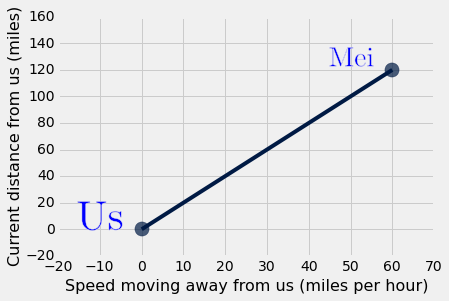

In [27]:
# Just run this cell.
small_driving_example = Table().with_columns([
        "Name", ["Us", "Mei"],
        "Current distance from us (miles)", [0, 120],
        "Speed moving away from us (miles per hour)", [0, 60]
    ])

small_driving_example.scatter(2, 1, s=200, fit_line=True)

# Fancy magic to draw each person's name with their dot.
for i in range(small_driving_example.num_rows):
    name = small_driving_example.column(0).item(i)
    x = small_driving_example.column(2).item(i)
    y = small_driving_example.column(1).item(i)
    plt.scatter([x - 10], [y + 10], s=2000, marker="$\mathrm{" + name + "}$")

The slope of the line is 2 hours.  (The units are vertical-axis units divided by horizontal-axis units, which are $\frac{\texttt{miles}}{\texttt{miles} / \texttt{hour}}$, or hours.)  So that's our answer.

Imagine that you don't know Mei's exact distance or speed, only rough estimates of them.  Then if you drew this line, you'd get a slightly bad estimate of the time since she left.  But if you measured the distance and speed of thousands of people who left you at the same time going different speeds, and drew a line between them, the slope of that line would be a pretty good estimate of the time they left, even if the individual measurements weren't exactly right.

The `drivers.csv` dataset contains the speeds and distances-from-start of 100 drivers who all left the same starting location at the same time, driving at a fixed speed on a straight line away from the start.  The measurements aren't exact.  Here we've created a scatter plot and drawn a line through the data.

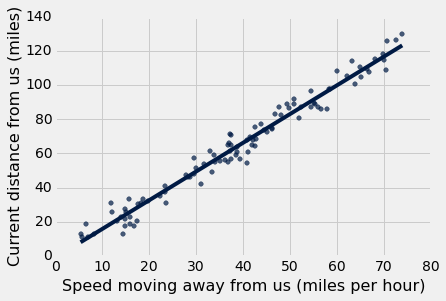

In [28]:
# Just run this cell.
Table.read_table("drivers.csv").scatter(0, 1, fit_line=True)

**Question 2.1.1.** By looking at the fit line, estimate how long ago (in hours) the drivers left.

In [29]:
# Fill in the start time you infer from the above line.
q211_start_time_hours = 10/6 #SOLUTION
q211_start_time_hours

1.6666666666666667

In [30]:
_ = lab08.grade('q211')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2.2. Back to cosmology
To do the same thing for the universe, we need to know the distance-from-Earth and speed-away-from-Earth of many stars.  Using pictures taken by very accurate telescopes and a lot of physics, astronomers have been able to estimate both.  It turns out that *nearby supernovae* -- stars that have recently died and exploded -- are among the best sources of this data.  This picture taken by the Hubble telescope shows an entire galaxy, with one bright supernova at the bottom left.

<img src="supernova.jpg">

Our astronomical data for today will come from the [Supernova Cosmology Project](http://supernova.lbl.gov/union/) at Lawrence Berkeley Lab.  The original dataset is [here](http://supernova.lbl.gov/union/figures/SCPUnion2.1_mu_vs_z.txt), with (brief) documentation [here](http://supernova.lbl.gov/union/descriptions.html#Magvsz).  Each row in the table corresponds to a supernova near Earth that was observed by astronomers.  From pictures like the one above, the astronomers deduced how far away each supernova was from Earth and how fast it was moving away from Earth.  Their deductions were good, but not perfect.

Run the cell below to load the data into a table called `close_novas` and make a scatter plot.

Distance (million parsecs),Speed (parsecs/year)
117.305,0.00873361
217.007,0.0153418
230.961,0.0162256
85.2853,0.00528131
185.051,0.0129474
212.841,0.0138862
151.728,0.0111837
82.6121,0.0060085
104.029,0.00838228
124.778,0.00812078


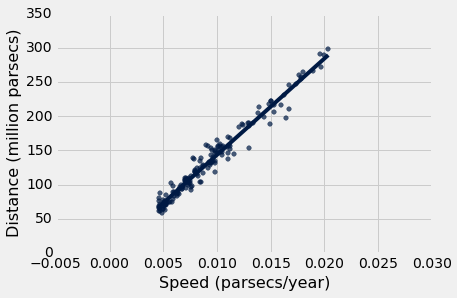

In [31]:
# Just run this cell.
close_novas = Table.read_table("close_novas.csv")

close_novas.scatter(1, 0, fit_line=True)
close_novas

**Question 2.2.1.** Looking this plot, make a guess at the age of the universe.

*Note:* Parsecs are a big unit of distance, equivalent to 30.86 trillion kilometers.

In [32]:
# Fill this in manually by examining the line above.
q221_universe_age_years = 150 * 10**6 / .01 #SOLUTION

# This just shows your guess as a nice string, in billions of years.
"{:,} billion years".format(round(q221_universe_age_years / 1e9, 2))

'15.0 billion years'

In [33]:
_ = lab08.grade('q221')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2.3. Fitting the line yourself
`fit_line=True` is convenient, but to really understand regression, you need to peek under the hood.  Inside, `scatter` uses an optimization procedure to compute the line it draws.  The least-squares regression line for our supernova data is
* the line
* with the smallest average (over all the supernovae we observe)
* error,
* squared,
* where the error is the difference between the prediction based on the line and the supernova's actual distance from Earth.

This plot shows one line we could try to use to fit this dataset, along with the errors made by that line for a few of the supernovas.  Squaring the length of each red bar, then averaging those squared lengths, tells us how badly the line fits.

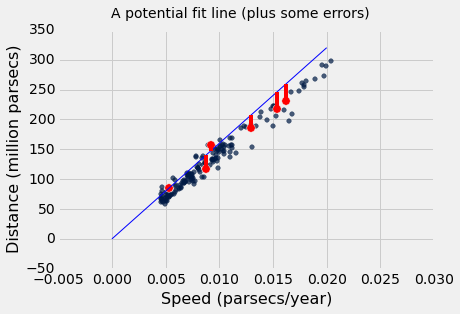

In [34]:
# Just run this cell.

# Plot all the novas first.
close_novas.scatter("Speed (parsecs/year)", "Distance (million parsecs)")
plt.suptitle("A potential fit line (plus some errors)")

# Over that plot, plot the proposed line, which is a little
# bit too high.
slope = 16000
right_line_end = 0.02
plt.plot([0.0, right_line_end], [0, slope*right_line_end], "b-", linewidth=1)

# Plot some of the errors:
novas_sample = close_novas.take([0, 1, 2, 3, 4, 41])
plt.scatter(novas_sample.column(1), novas_sample.column(0), c="r", zorder=2, s=70)
for i in range(novas_sample.num_rows):
    x = novas_sample.column("Speed (parsecs/year)").item(i)
    y = novas_sample.column("Distance (million parsecs)").item(i)
    line_y = slope*x
    plt.plot([x, x], [y, line_y], "r-")

What we want is to choose a line that minimizes the average squared error.  To simplify things, we'll assume that the vertical intercept of our lines is 0 (since the physical model implies that's true).  So we only have to choose one thing, the *slope* of the line.  We'll do it in steps.

First we need a way to compute errors.  To compute errors, we have to compute the predictions we'd make if we modeled the data with a line.  The function below takes a line's slope and an *array* of speeds and returns an array of predicted distances using that line (with intercept 0):

In [35]:
# Just run this cell.
def predicted_distances(line_slope, speeds):
    return line_slope * speeds

**Question 2.3.1.** Use `predicted_distances` to compute the predictions of a line with slope 16,000 for the `close_novas` dataset.  (These are the distances we'd predict if we knew the universe were $16000 \times 1000000$, or 16 billion, years old.)  Call these `q231_predictions`.  The following line makes a scatter plot of these predictions.  The actual speed of each supernova is on the horizontal axis, and its predicted distance is on the vertical axis.

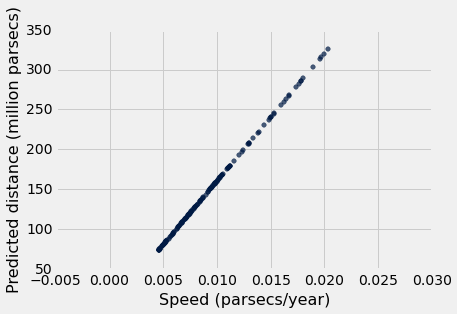

In [36]:
# Fill this in.
q231_predictions = predicted_distances(16000, close_novas.column("Speed (parsecs/year)")) #SOLUTION

# This makes a scatter plot of your predictions.  You don't
# need to change it.
close_novas.with_column("Predicted distance (million parsecs)", q231_predictions).scatter(1, 2)

In [37]:
_ = lab08.grade('q231')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The function `errors` takes a single argument, the slope of a line.  It returns an array of the prediction errors we get when we fit a line of that slope to the `close_novas` dataset.

In [38]:
# Just run this cell.
def errors(line_slope):
    predictions = predicted_distances(line_slope, close_novas.column("Speed (parsecs/year)"))
    return predictions - close_novas.column("Distance (million parsecs)") 

**Question 2.3.2.** Using `errors`, compute the errors for the line with slope `16000` on the `close_novas` dataset.  Then make a scatter plot of the errors.

*Hint:* To make a scatter plot of the errors, plot the error for each supernova in the dataset.  Put the speed on the horizontal axis and the error on the vertical axis.

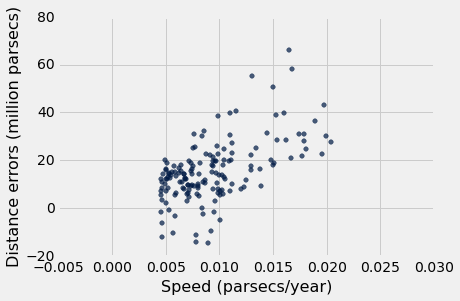

In [39]:
q232_errors = errors(16000) #SOLUTION
close_novas.with_column("Distance errors (million parsecs)", q232_errors).scatter(1, 2) #SOLUTION

In [40]:
_ = lab08.grade('q232')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



You should find that the errors are almost all positive.  That means our line is a little bit too steep.  Let's find a better one.

**Question 2.3.3.** Write a function called `mean_squared_error`.  It should take a single argument, the slope of a line.  It should return the average squared error for a line with that slope (and intercept 0) on the `close_novas` dataset.

*Hint:* Use the `errors` function.  Your answer should be fairly short.

In [41]:
def mean_squared_error(slope):
    return np.mean(errors(slope) ** 2)  #SOLUTION

In [42]:
_ = lab08.grade('q233')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now that you've defined our objective function, we can graph it:

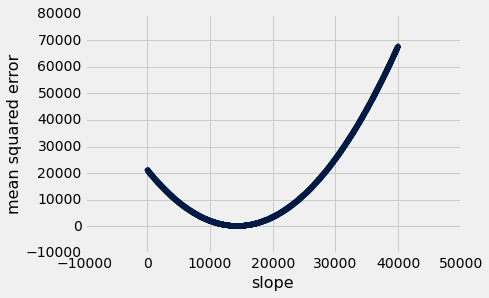

In [43]:
# Just run this cell.
slopes = Table().with_column("slope", np.arange(0, 40000, 10))
mses = slopes.with_column("mean squared error", slopes.apply(mean_squared_error, "slope"))
mses.scatter(0, 1)

And we can compute the best slope by calling `minimize` on it:

In [44]:
best_line_slope = minimize(mean_squared_error)

# This just shows your answer as a nice string, in billions of years.
"{:,} billion years".format(round(best_line_slope/1000, 4))

'14.3143 billion years'

That slope, as we've seen, is an estimate of the age of the universe.  The current best estimate of the age of the universe is 13.799 billion years.  Did we get close?

In [45]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [lab08.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [46]:
# Run this cell to submit your work *after* you have passed all of the test cells.
# It's ok to run this cell multiple times. Only your final submission will be scored.

!TZ=America/Los_Angeles ipython nbconvert --output=".lab08_$(date +%m%d_%H%M)_submission.html" lab08.ipynb && echo "Submitted successfully."

[NbConvertApp] WARNING | pattern 'lab08.ipynb' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--debug
    set log level to logging.DEBUG (maximize logging output)
--inplace
    Run nbconvert in place, overwriting the existing notebook (only 
    relevant when converting to notebook format)
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--stdout
    Write notebook output to stdout instead of files.
--generate-config
    gen